# Pandas

In [1]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt

### Example Board Games 

In [2]:
games = pandas.read_csv("https://gist.githubusercontent.com/8snit/4ea098f557682e0fd9e2b0c9e12be950/raw/91425fa386630a949e7e2a5f498a50b99f462a0b/board_games.csv")

In [3]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [4]:
games.shape

(81312, 20)

In [5]:
games.head(5)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [6]:
games.iloc[0:3,0:3] 

,id,type,name
0,12333,boardgame,Twilight Struggle
1,120677,boardgame,Terra Mystica
2,102794,boardgame,Caverna: The Cave Farmers


(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

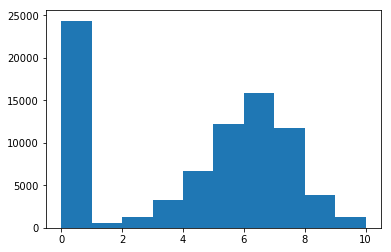

In [7]:
plt.hist(games["average_rating"])

In [8]:
games[games["average_rating"] == 0].iloc[0:3]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0


In [9]:
games[games["average_rating"] == 0].shape

(24380, 20)

In [10]:
games[games["average_rating"] > 0].iloc[0:3]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761


In [11]:
ratedgames = games[games["users_rated"] > 0]
ratedgames.shape

(56932, 20)

In [12]:
validyeargames = ratedgames[ratedgames["yearpublished"] > 1900]
ratedgames.shape

(56932, 20)

In [13]:
cleangames = validyeargames.dropna(axis=0)
cleangames.shape

(53045, 20)

In [15]:
cleangames.groupby("yearpublished").sum().sort_values("average_rating")

,id,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
yearpublished,,,,,,,,,,,,,,,,,
1917.0,12426,2.0,4.0,20.0,20.0,20.0,6.0,7,5.00000,0.00000,19,1,1,2,5,1,1.0000
1901.0,70714,4.0,12.0,30.0,30.0,30.0,8.0,13,8.95455,0.00000,26,1,0,1,3,3,1.0000
1923.0,63160,2.0,6.0,0.0,0.0,0.0,0.0,2,9.00000,0.00000,0,0,0,0,0,0,0.0000
1919.0,36004,2.0,2.0,180.0,180.0,180.0,12.0,49,9.03125,5.52732,83,2,3,7,27,8,2.1250
1916.0,34764,4.0,8.0,30.0,30.0,30.0,4.0,233,9.04233,5.12650,354,16,4,18,112,26,1.0385
1908.0,100002,3.0,4.0,80.0,80.0,80.0,17.0,68,11.19846,5.46980,170,9,5,11,40,5,1.4000
1924.0,96994,7.0,10.0,110.0,110.0,110.0,11.0,10,11.85000,0.00000,21,4,4,1,7,2,2.0000
1909.0,34820,4.0,4.0,50.0,50.0,50.0,20.0,786,11.85092,11.31455,467,7,4,12,209,74,3.1361
1907.0,50296,5.0,12.0,30.0,30.0,30.0,10.0,5,13.25000,0.00000,7,0,1,3,2,1,5.0000
